In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('shop data.csv')

In [3]:
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [4]:
x = df.drop('buys', axis=1) 
#x = df[['age', 'income', 'gender', 'm_status']]

In [5]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [6]:
#y = df.iloc[:,4]
y = df.buys

In [ ]:
y

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le_x = LabelEncoder()
x = x.apply(le_x.fit_transform)

In [10]:
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30, random_state=42)

In [12]:
xtrain

,age,income,gender,m_status
11,0,2,1,0
3,2,2,1,1
4,2,1,0,1
17,1,0,0,1
12,0,0,0,1
18,0,2,0,0
16,2,2,1,0
2,0,0,1,1
9,2,2,0,0
21,1,1,1,1


In [13]:
xtest

,age,income,gender,m_status
0,1,0,1,1
13,2,2,1,0
8,1,1,0,1
1,1,0,1,0
15,1,0,0,0
5,2,1,0,1
20,2,2,0,0


In [14]:
ytest

0      no
13     no
8     yes
1      no
15    yes
5      no
20     no
Name: buys, dtype: object

In [15]:
ytrain

11    yes
3     yes
4     yes
17    yes
12    yes
18    yes
16    yes
2     yes
9     yes
21    yes
7      no
10    yes
14     no
19    yes
6     yes
Name: buys, dtype: object

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dect = DecisionTreeClassifier()

In [18]:
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [19]:
dect.predict(xtest)

array(['no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [20]:
dect.score(xtest, ytest)

0.5714285714285714

**Performance using cross_val_score**

In [21]:
from sklearn.model_selection import cross_val_score

In [26]:
result = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [27]:
result.mean()

0.54

In [30]:
from sklearn.linear_model import LogisticRegression
result = cross_val_score(LogisticRegression(), x, y, cv=5)
result

array([0.4 , 0.6 , 0.75, 0.5 , 0.75])

In [31]:
result.mean()

0.6

In [28]:
from sklearn.neighbors import KNeighborsClassifier
result = cross_val_score(KNeighborsClassifier(n_neighbors=3), x, y, cv=5)
result

array([0.4 , 0.4 , 0.75, 0.5 , 0.5 ])

In [29]:
result.mean()

0.51

In [32]:
y_predict = dect.predict(xtest)
y_predict

array(['no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

          no       1.00      0.40      0.57         5
         yes       0.40      1.00      0.57         2

    accuracy                           0.57         7
   macro avg       0.70      0.70      0.57         7
weighted avg       0.83      0.57      0.57         7



In [ ]:
#xinput = np.array([1,0,0,1])
xinput = np.array([1,0,1,1])

In [ ]:
y_predict = dect.predict([xinput])

In [ ]:
y_predict

[Text(0.3333333333333333, 0.9166666666666666, 'gender <= 0.5\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5, 0.75, 'age <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.5833333333333334, 'age <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.5, 0.4166666666666667, 'm_status <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.25, 'income <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

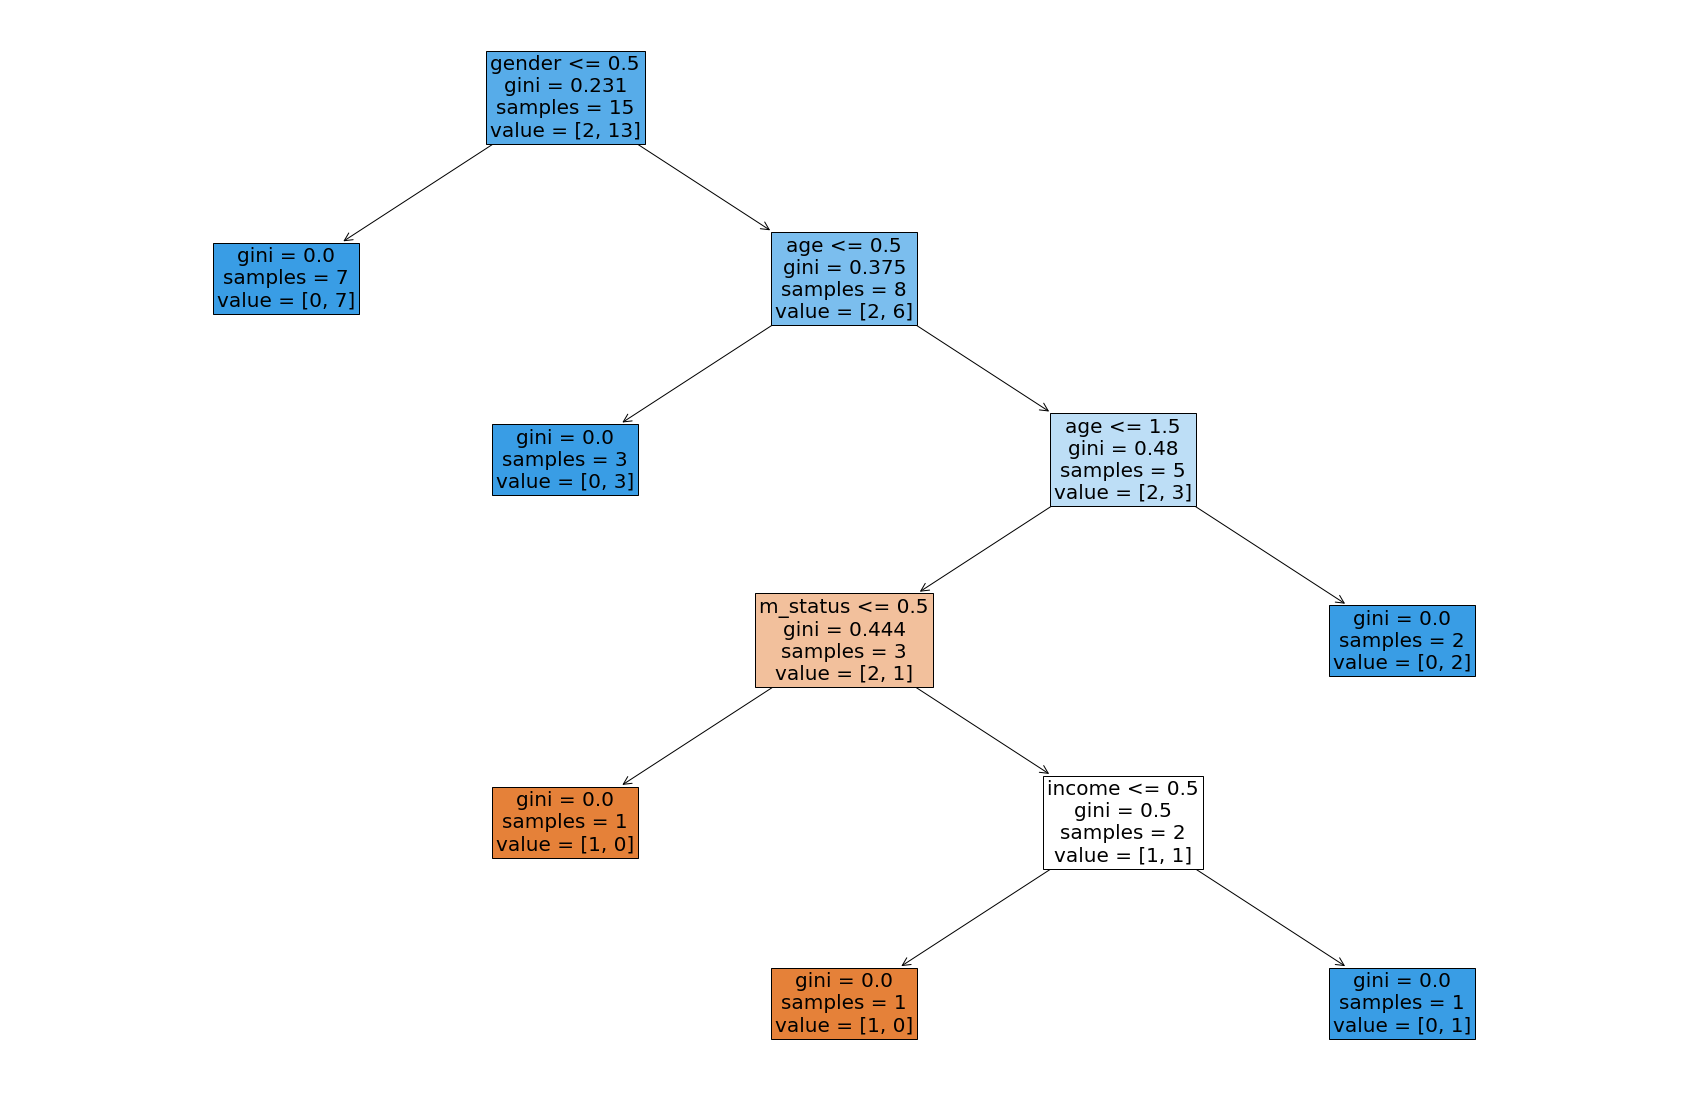

In [35]:
from sklearn import tree
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(30,20))
tree.plot_tree(dect, feature_names=x.columns, filled=True, fontsize=20)

### Tree Explanation

<img src="tree.jpg" />

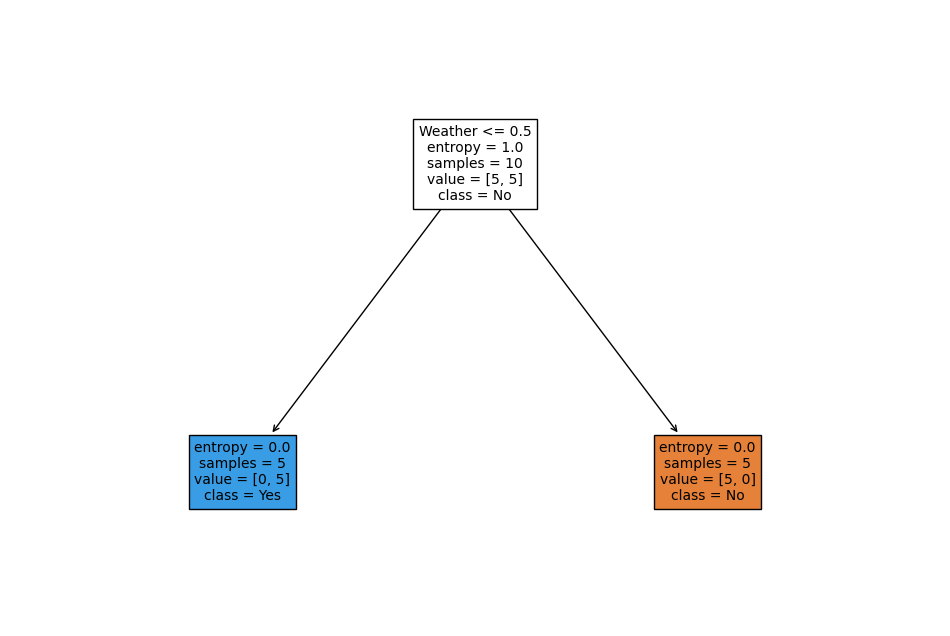

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


data = {
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy'],
    'Humidity': ['Normal', 'Normal', 'Normal', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong', 'Weak'],
    'Play': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}

df = pd.DataFrame(data)


le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Play'] = le.fit_transform(df['Play'])


X = df.drop('Play', axis=1)
y = df['Play']


clf = DecisionTreeClassifier(criterion='entropy')  # You can use 'gini' or 'entropy' as the criterion


clf.fit(X, y)


plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.show()


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a DataFrame with the provided entropy values
data = {
    'Feature': ['Weather', 'Humidity', 'Wind'],
    'Entropy': [0.124, 0.6, 0.0]
}

df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df.drop('Entropy', axis=1)
y = df['Entropy']

# Create a Decision Tree Regressor (since we are using entropy values)
regressor = DecisionTreeRegressor(criterion='mse')  # 'mse' is used for regression

# Fit the regressor to the data
regressor.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()


InvalidParameterError: The 'criterion' parameter of DecisionTreeRegressor must be a str among {'squared_error', 'friedman_mse', 'absolute_error', 'poisson'}. Got 'mse' instead.

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a DataFrame with the provided entropy values
data = {
    'Feature': ['Weather', 'Humidity', 'Wind'],
    'Entropy': [0.124, 0.6, 0.0]
}

df = pd.DataFrame(data)
df


,Feature,Entropy
0,Weather,0.124
1,Humidity,0.600
2,Wind,0.000


In [12]:
# Separate features (X) and target (y)
y = df.drop('Entropy', axis=1)
X = df['Entropy'].reshape(1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [13]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the classifier to the data
clf.fit([], )
tree.plot_tree(clf)

ValueError: Number of labels=3 does not match number of samples=1

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(8, 6))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a DataFrame with the provided entropy values
data = {
    'Feature': [1, 2, 3],  # Dummy labels for features
    'Entropy': [0.124, 0.6, 0.0]
}

df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df.drop('Entropy', axis=1)
y = df['Entropy']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the data
clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(8, 6))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()


ValueError: Unknown label type: 'continuous'

In [14]:
from sklearn import tree

In [15]:
clf = tree.DecisionTreeClassifier(random_state=0)

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.062\ngini = 0.667\nsamples = 3\nvalue = [1, 1, 1]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 0.362\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]')]

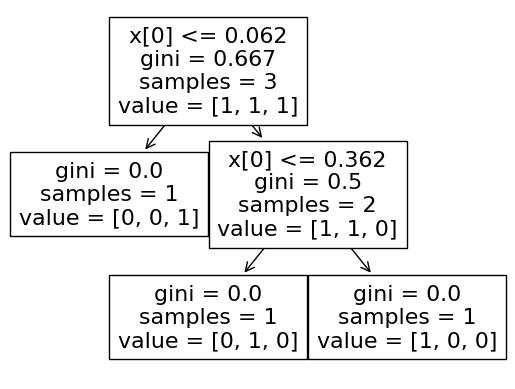

In [16]:
clf = clf.fit([
    [0.124],
    [0.6],
    [0.0]
], ['Weather', 'Humidity', 'Wind'])
tree.plot_tree(clf)

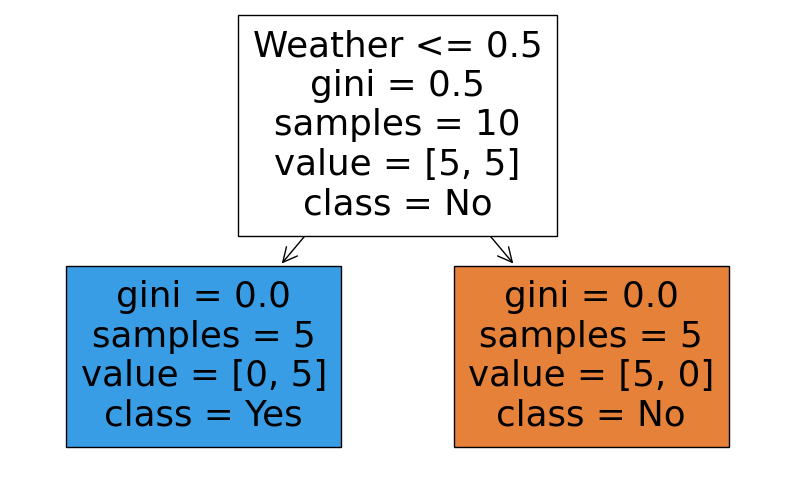

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy'],
    'Humidity': ['Normal', 'Normal', 'Normal', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong', 'Weak'],
    'Play': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Encode categorical features to numerical values
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])
df['Humidity'] = le.fit_transform(df['Humidity'])
df['Wind'] = le.fit_transform(df['Wind'])
df['Play'] = le.fit_transform(df['Play'])

# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()


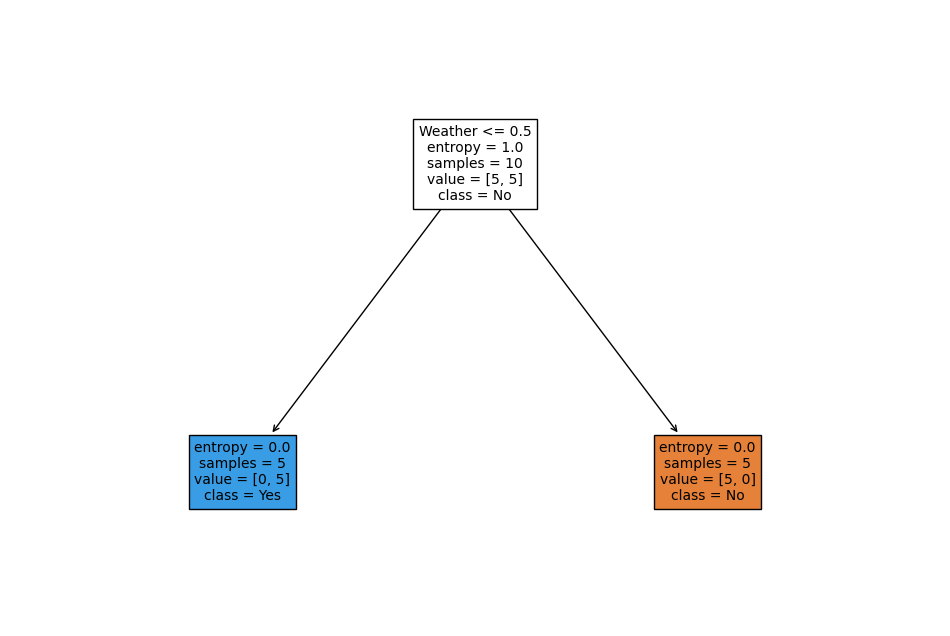

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a DataFrame with the provided Gain values
data = {
    'Feature': ['Weather', 'Humidity', 'Wind'],
    'Gain': [0.124, 0.6, 0.0]
}

df = pd.DataFrame(data)

# Create a Decision Tree Classifier with a custom splitting criterion
class CustomDecisionTreeClassifier(DecisionTreeClassifier):
    def find_best_split(self, X, y):
        # Modify this method to use the provided Gain values for splitting criteria
        best_feature = None
        best_gain = -1
        
        for feature in X.columns:
            gain = df[df['Feature'] == feature]['Gain'].values[0]  # Get the Gain value for the feature
            if gain > best_gain:
                best_gain = gain
                best_feature = feature
        
        return best_feature, best_gain

clf = CustomDecisionTreeClassifier(criterion='entropy')  # You can use 'entropy' or 'gini' as the criterion
clf.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.show()
